In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 15.0)

In [2]:
T = 10.
dt = 1E-3
N = int(T/dt)
TIME = np.linspace(0, T, N)

In [3]:
k = .04, 5, 140
u0 = -20
v0 = -70
v_thr = 30

a, b, c, d = .02, -.1, -55, 6

$$
f\left( v \right) = k_1 \cdot v^2 + k_2 \cdot v + k_3
$$

In [4]:
def f(v):
    return k[0] * (v**2) + k[1] * v + k[2]

$$
\dot{v} = f\left( v \right) - u + I
$$

In [5]:
def Vt(v, u, I):
    return f(v) - u + I

$$
\dot{u} = a \cdot \left( b \cdot v - u \right)
$$

In [6]:
def Ut(v, u):
    return a * (b * v - u)

$$
v \approx v_{thr}
\Longrightarrow
\begin{cases}
v \rightarrow c \\
u \rightarrow u + d
\end{cases}
$$

# Isoclines

$$
\begin{cases}
0 = \dot{v} = f\left( v \right) - u + I \\
0 = \dot{u} = a \cdot \left( b \cdot v - u \right)
\end{cases}
\Longrightarrow
\begin{cases}
k_1 \cdot v^2 + k_2 \cdot v + k_3 - u + I = 0\\
a \cdot \left( b \cdot v - u \right) = 0
\end{cases}
\Longrightarrow
\begin{cases}
k_1 \cdot v^2 + v \cdot \left( k_2 - b \right) + k_3 + I = 0\\
b \cdot v = u
\end{cases}
$$

Discriminant for the first equation
$$
D = \left( k_2 - b \right)^2 - 4 \cdot k_1 \cdot \left( k_3 + I \right)
$$

Thus
$$
\begin{cases}
v_{1, 2} = \frac{b - k_2 \pm \sqrt{\left( k_2 - b \right)^2 - 4 \cdot k_1 \cdot \left( k_3 + I \right)}}{2 \cdot k_1} \\
u_{1, 2} = v_{1, 2} \cdot b
\end{cases}
$$

Critical value for $I$ can be fetched from the equation
$$
\left( k_2 - b \right)^2 - 4 \cdot k_1 \cdot \left( k_3 + I \right) = 0
$$
Result is
$$
I_{cr} = \frac{\left( k_2 - b \right)^2}{4 \cdot k_1} - k_3
$$

In [7]:
I_critical = ((k[1] - b)**2) / (4 * k[0]) - k[2]; I_critical

22.56249999999997

In [8]:
v_critical = (b - k[1]) / (2 * k[0]); v_critical

-63.74999999999999

In [9]:
u_critical = b * v_critical; u_critical

6.375

# Critical values

$$
\begin{cases}
v_{cr} = \frac{b - k_2}{2 \cdot k_1} \\
u_{cr} = b \cdot v_{cr}
\end{cases}
$$

# Linearization

$$
\begin{cases}
\dot{v} = k_1 \cdot v^2 + k_2 \cdot v + k_3 - u + I \\
\dot{u} = a \cdot \left( b \cdot v - u \right)
\end{cases}
$$

Jacobian
$$
J =
\begin{bmatrix}
2 \cdot k_1 \cdot v + k_2 & -1 \\
a \cdot b & -a
\end{bmatrix}
$$

Linearized Jacobian
$$
J_l =
\begin{bmatrix}
b & -1 \\
a \cdot b & -a
\end{bmatrix}
$$

Characteristics polynomial
$$
\begin{vmatrix}
b - \lambda & -1 \\
a \cdot b & -a - \lambda
\end{vmatrix}
= \left( - b + \lambda \right) \cdot \left( a + \lambda \right) + a \cdot b
= - b \cdot a + \lambda \cdot a - b \cdot \lambda + \lambda \cdot \lambda + a \cdot b
= \lambda^2 + \lambda \cdot \left( a - b \right) = 0
$$

Finally
$$
\lambda \cdot \left( \lambda + a - b \right) = 0
$$
Solutions
$$
\begin{cases}
\lambda_1 = 0 \\
\lambda_2 = b - a
\end{cases}
$$

In [10]:
lambdas = 0, b - a; lambdas

(0, -0.12000000000000001)

In [11]:
(lambdas[0] + lambdas[1]) / 2, lambdas[0] - (lambdas[0] + lambdas[1]) / 2

(-0.060000000000000005, 0.060000000000000005)

$\lambda_{1, 2} = 0.06 \mp 0.06$ &mdash; eigenvalues are real and of opposite signs &mdash; we have a saddle point which is always unstable [equilibrium](http://www.scholarpedia.org/article/Equilibrium)

# Eigenvectors

By definition eigenvectors $e_{1, 2}$ can be found from the equation
$$
\begin{bmatrix}
b & -1 \\
a \cdot b & -a
\end{bmatrix}
\cdot e
= e \cdot \lambda
$$
In scalar form
$$
\begin{bmatrix}
e_v \cdot b - e_u \\
e_v \cdot a \cdot b - e_u \cdot a
\end{bmatrix}
= \begin{bmatrix} e_v \\ e_u \end{bmatrix}
\cdot \lambda
$$
Move right part to left
$$
\begin{bmatrix}
e_v \cdot \left( b - \lambda \right) - e_u \\
e_v \cdot a \cdot b - e_u \cdot \left( a + \lambda \right)
\end{bmatrix}
= \begin{bmatrix} 0 \\ 0 \end{bmatrix}
$$
We can easily find equations for $e_u$
$$
\begin{cases}
e_u = e_v \cdot \left( b - \lambda \right) \\
e_u = e_v \cdot \frac{a \cdot b}{a + \lambda}
\end{cases}
$$

As the rank of matrix is $1$ because determinant is $0$ by condition of eigenvalues,
we can have eigenvectors with $e_v = 1$
$$
e_{1, 2}
= \begin{bmatrix}
1 \\
b - \lambda_{1, 2}
\end{bmatrix}
$$

In [12]:
e_y = b - lambdas[0], b - lambdas[1]; e_y

(-0.1, 0.020000000000000004)

In [13]:
e_x = 1

# Check

Following numbers should be almost equal to zero (almost because of machine)

In [14]:
results = ((- b + lambdas[1]) * (a + lambdas[1]) + a*b,
           (- b + lambdas[0]) * (a + lambdas[0]) + a*b)
assert np.allclose(results, (0., 0.))
results

(4.336808689942018e-19, 0.0)

Following calculations are done with NumPy library and contain real eigenvalues and normed eigenvectors

In [15]:
np.linalg.eig([[b, -1], [a*b, -a]])

(array([-0.12,  0.  ]), array([[-0.99980006,  0.99503719],
        [-0.019996  , -0.09950372]]))

These are the values of the right part of the solved equation
$$
\begin{bmatrix}
b & -1 \\
a \cdot b & -a
\end{bmatrix}
\cdot e_{1, 2}
$$

In [16]:
left = (np.array([[b, -1], [a*b, -a]]).dot([e_x, e_y[0]]),
        np.array([[b, -1], [a*b, -a]]).dot([e_x, e_y[1]]))
left

(array([ 0.,  0.]), array([-0.12  , -0.0024]))

These are the right ones
$$
e \cdot \lambda
$$

In [17]:
right = (np.array([e_x, e_y[0]]) * lambdas[0],
         np.array([e_x, e_y[1]]) * lambdas[1])
right

(array([ 0., -0.]), array([-0.12  , -0.0024]))

If they're almost equal we've done

In [18]:
assert np.allclose(left[0], right[0]) and np.allclose(left[1], right[1])

## Eigenvectors

Let's normalize our eigenvectors
$$
e := \frac{e}{\left\| e \right\|}
$$

In [19]:
eigennorm = (e_x**2 + e_y[0]**2)**.5, (e_x**2 + e_y[1]**2)**.5; eigennorm

(1.004987562112089, 1.000199980003999)

In [20]:
e_x_ = (1./eigennorm[0], 1./eigennorm[1])
e_y_ = (e_y[0] / eigennorm[0], e_y[1] / eigennorm[1])
e_x_, e_y_

((0.9950371902099893, 0.9998000599800071),
 (-0.09950371902099893, 0.019996001199600145))

In [21]:
(e_x_[0]**2 + e_y_[0]**2)**.5, (e_x_[1]**2 + e_y_[1]**2)**.5

(1.0, 1.0)

In [22]:
(e_y_[0] + e_y_[1])/2, (e_y_[0] + e_y_[1])/2 - e_y_[0], (e_y_[0] + e_y_[1])/2 - e_y_[1]

(-0.039753858910699394, 0.059749860110299535, -0.059749860110299535)

In [23]:
(e_x_[0] + e_x_[1])/2, (e_x_[0] + e_x_[1])/2 - e_x_[0], (e_x_[0] + e_x_[1])/2 - e_x_[1]

(0.9974186250949981, 0.0023814348850088596, -0.0023814348850089706)

$e_{1, 2} = \begin{bmatrix}
0.997 \mp 0.002  \\
-0.04 \pm 0.06
\end{bmatrix}$

In [24]:
def get_curve(I, init=(v0, u0)):
    vs = np.empty_like(TIME)
    us = np.empty_like(TIME)
    # vs[0], us[0] = v_critical, u_critical
    vs[0], us[0] = init
    count = 0
    for i in range(len(TIME)- 1):
        dv, du = Vt(vs[i], us[i], I), Ut(vs[i], us[i])
        vs[i + 1] = vs[i] + dv * dt
        us[i + 1] = us[i] + du * dt
        # if vs[i] <= v_thr:
        if vs[i] >= v_thr:
            count += 1
            vs[i + 1] = c
            us[i + 1] = us[i] + d
    return (vs, us, count)

In [25]:
def get_plot(I, init=(v0, u0)):
    vs, us, count = get_curve(I, init)
    
    fig = plt.figure(1)
    fig.suptitle('$I = %4.2f,\; v_0 = %4.2f,\; u_0 = %4.2f$'%(I, init[0], init[1]), fontsize=24)

    plt.subplot(221)
    plt.plot(TIME, vs)

    plt.subplot(222)
    plt.plot(TIME, us)
    plt.show()

    plt.subplot(212)
    plt.plot(vs, us)

    plt.show()

# Separatrix

Let's take a look at plots with
$$\left( v_0, u_0 \right) = \left( v_{crit} \pm e_v, u_{crit} \pm e_u \right)$$

In [26]:
multiplier = 10.
delta_v = multiplier * e_x_[1]
delta_u_unstable = multiplier * e_y_[1]
delta_v, delta_u_unstable

(9.99800059980007, 0.19996001199600144)

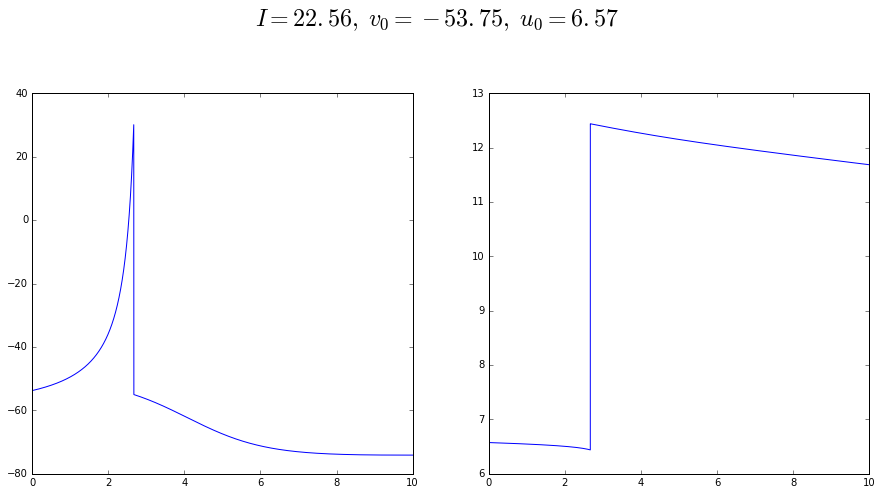

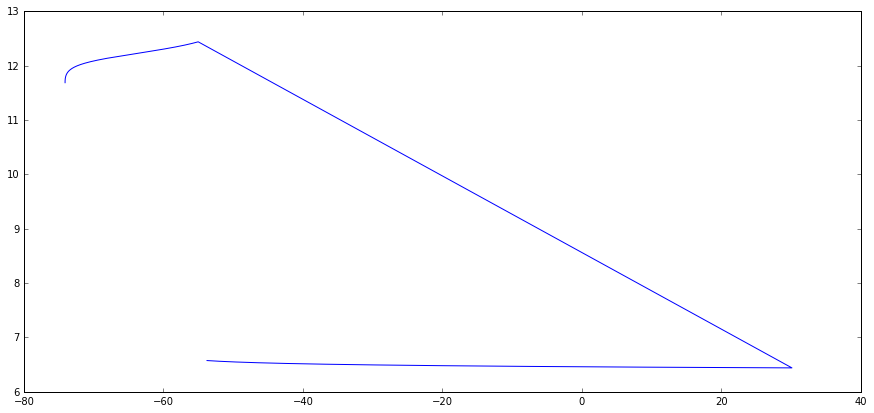

In [27]:
get_plot(I_critical, (v_critical + delta_v, u_critical + delta_u_unstable))

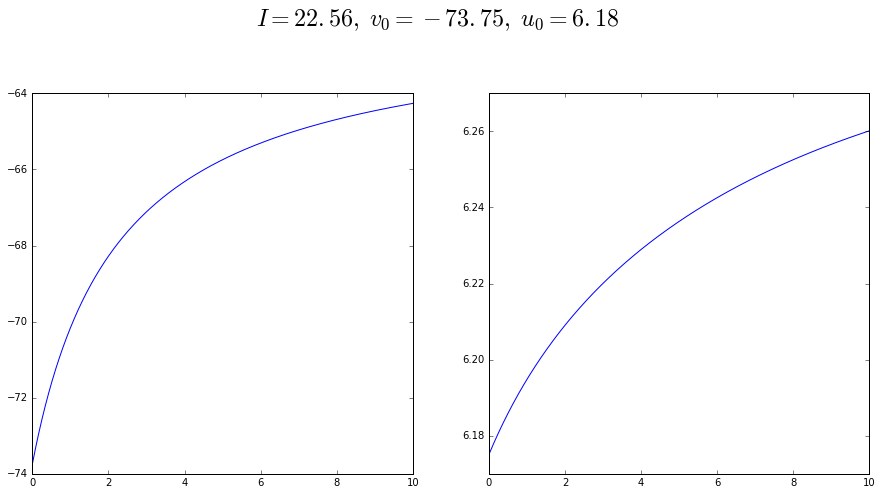

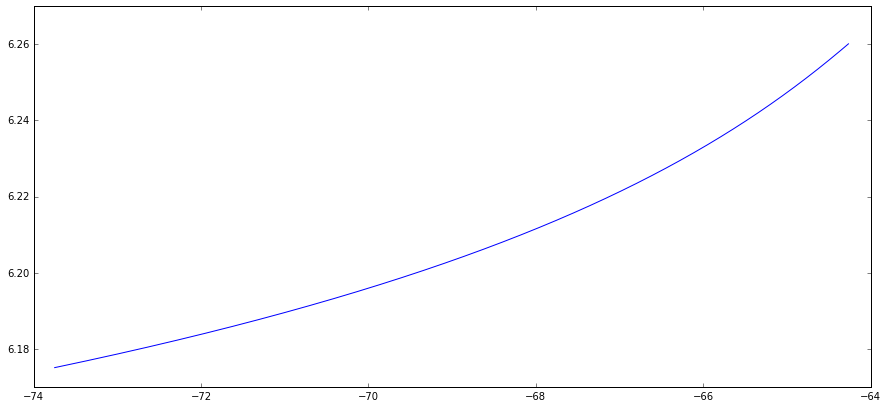

In [28]:
get_plot(I_critical, (v_critical - delta_v, u_critical - delta_u_unstable))

# Phase portrait

Now we can use
$$\left( v_0, u_0 \right) = \left( -70, -20 \right)$$

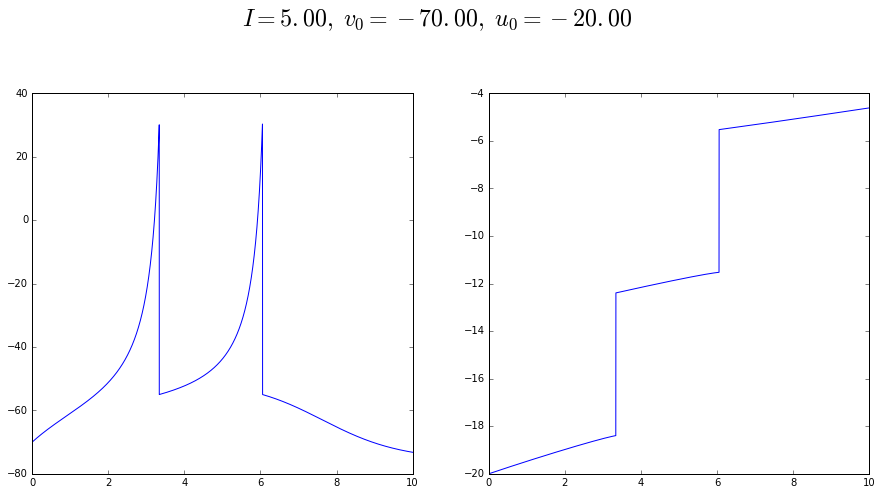

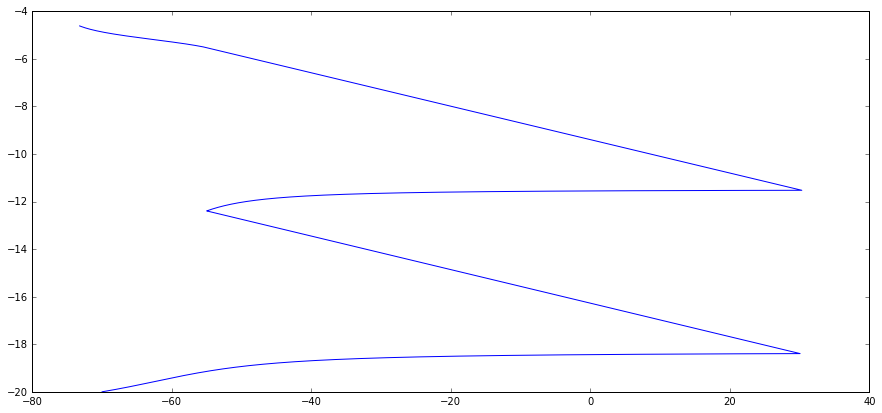

In [29]:
get_plot(5)

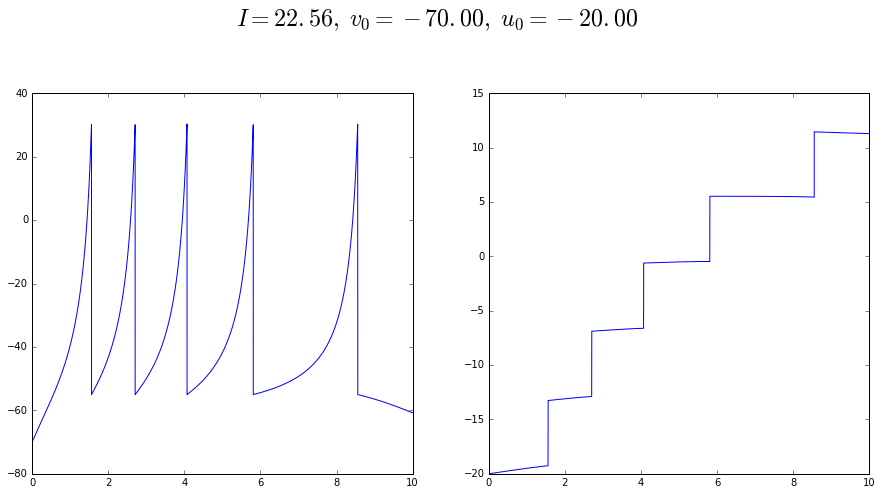

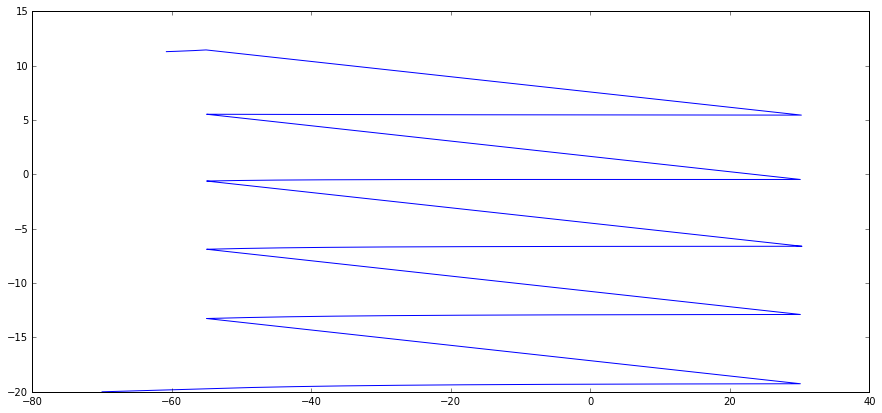

In [30]:
get_plot(I_critical)

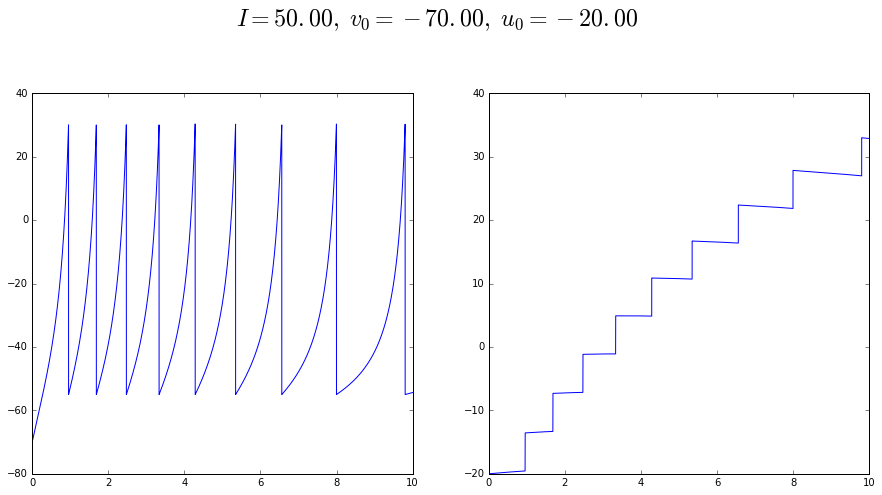

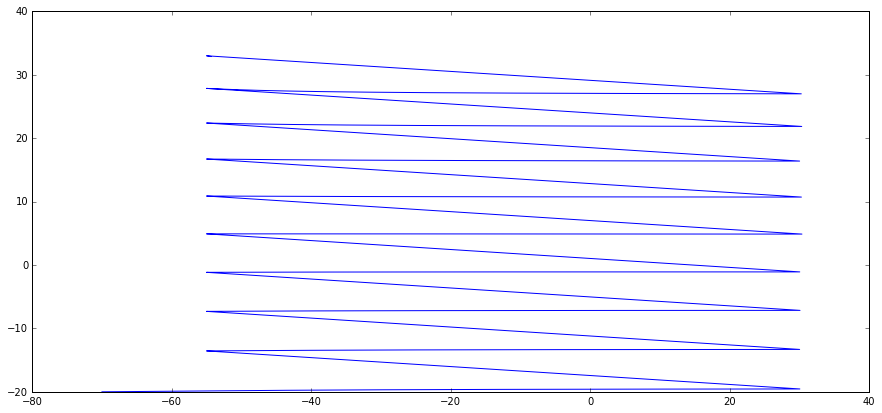

In [31]:
get_plot(50)

In [32]:
delta_I = 100 - 0
PEAK_COUNT = 20
result = [(I_critical + delta_I/(PEAK_COUNT-i), get_curve(I_critical + delta_I/(PEAK_COUNT-i))[2]) for i in range(PEAK_COUNT)]; result

[(27.56249999999997, 6),
 (27.825657894736814, 6),
 (28.11805555555553, 6),
 (28.444852941176443, 6),
 (28.81249999999997, 6),
 (29.22916666666664, 6),
 (29.705357142857114, 6),
 (30.254807692307665, 6),
 (30.895833333333307, 6),
 (31.653409090909065, 6),
 (32.56249999999997, 6),
 (33.673611111111086, 6),
 (35.06249999999997, 7),
 (36.848214285714256, 7),
 (39.22916666666664, 7),
 (42.56249999999997, 8),
 (47.56249999999997, 8),
 (55.89583333333331, 9),
 (72.56249999999997, 11),
 (122.56249999999997, 17)]

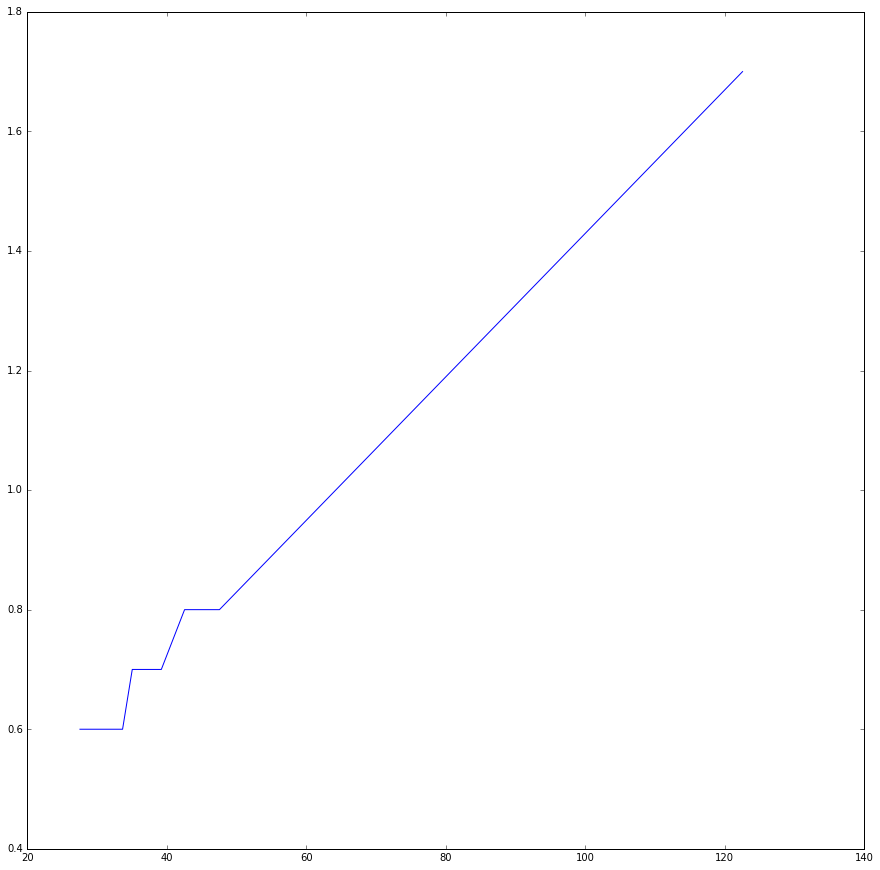

In [33]:
counts = [r[1]/T for r in result]
Is = [r[0] for r in result]
plt.plot(Is, counts)
plt.show()